In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['axes.titlesize'] = 20  # For axis title
plt.rcParams['axes.labelsize'] = 18  # For x and y labels
plt.rcParams['xtick.labelsize'] = 14 # For x tick labels
plt.rcParams['ytick.labelsize'] = 14 # For y tick labels

In [3]:
def normalize(psi,dx):
    return psi/np.sqrt(sum(abs(psi)**2*dx))
def string_to_complex(s):
    return complex(s.replace('i', 'j'))
string_to_complex_v = np.vectorize(string_to_complex)

0.9999999999999998
1.0


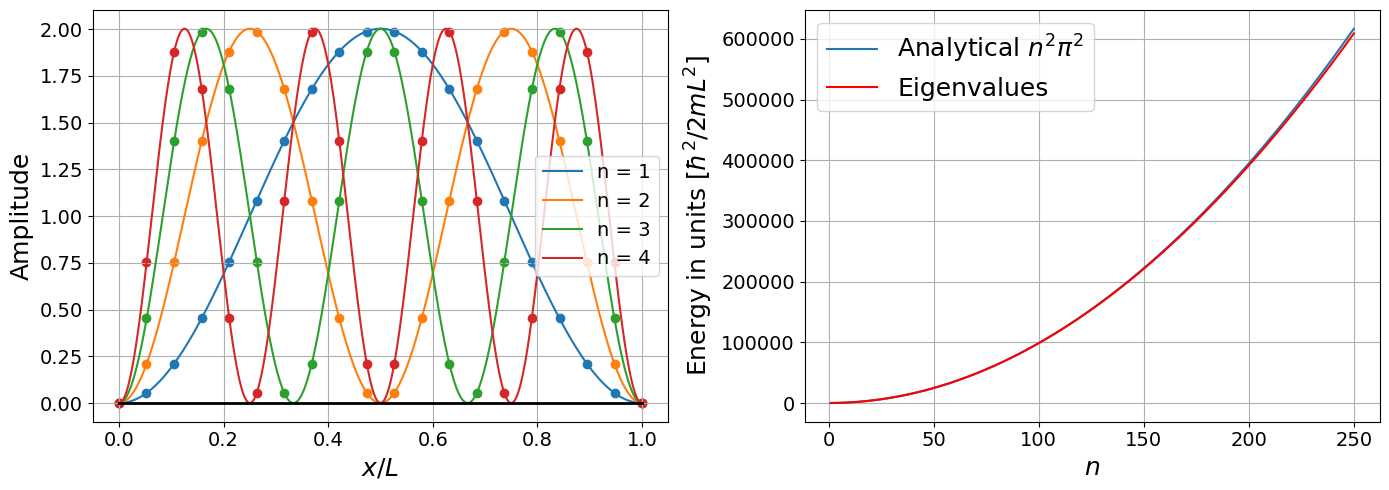

In [4]:
data = pd.read_csv('../data/raw/eigenvectors_infwell.csv', header=None)
eigenvectors = data.to_numpy()

# Determine the number of points and create a position array
N = eigenvectors.shape[0]

x = np.linspace(0, 1, N+2)  # +2 to include the boundaries
dx = x[1]-x[0]
x_an = np.linspace(0, 1, 20)  # +2 to include the boundaries

plt.figure(figsize=(14, 5))
plt.tight_layout()
plt.subplot(1, 2, 1)
for i in range(min(4, eigenvectors.shape[1])):  # Plot the first 5 eigenvectors
    eigenvectors[:,i] = normalize(eigenvectors[:,i], dx)
    plt.plot(x, np.abs(np.insert(np.append(eigenvectors[:,i], 0), 0, 0))**2, label=f'n = {i+1}')

plt.legend(fontsize =14)

plt.plot([0, 1], [0, 0], color='k', linewidth=2)
plt.scatter(x_an, np.abs(np.sin(np.pi*x_an)*np.sqrt(2))**2)
plt.scatter(x_an, np.abs(np.sin(2*np.pi*x_an)*np.sqrt(2))**2)
plt.scatter(x_an, np.abs(np.sin(3*np.pi*x_an)*np.sqrt(2))**2)
plt.scatter(x_an, np.abs(np.sin(4*np.pi*x_an)*np.sqrt(2))**2)

#plt.title('Stationary states probability density $|\psi|^2$', fontsize = 18)
plt.xlabel('$x/L$', fontsize = 18)
plt.ylabel('Amplitude', fontsize = 18)
plt.grid(True)

print(np.sqrt(np.sum(dx*abs(eigenvectors[:, i])**2)))
print(np.sum(((np.sin(np.pi*x)*np.sqrt(2))**2)*dx))

data = pd.read_csv('../data/raw/eigenvalues_infwell.csv', header=None)
eigenvalues = data.to_numpy()
plt.subplot(1, 2, 2)
n = eigenvalues.shape[0]
n_arr = np.linspace(1, n, n)
#plt.title("Energy eigenstates $\lambda_n$", fontsize = 18)
plt.plot(n_arr, (n_arr*np.pi)**2, label = "Analytical $n^2 \pi^2$")
plt.plot(n_arr, eigenvalues, color = 'red', label = "Eigenvalues")
plt.xlabel('$n$', fontsize = 18)
plt.ylabel("Energy in units $[\hbar^2/2mL^2]$", fontsize =18)
plt.legend(fontsize =18)
plt.grid(True)
plt.tight_layout()
plt.savefig("../data/plots/stationary_box.png")



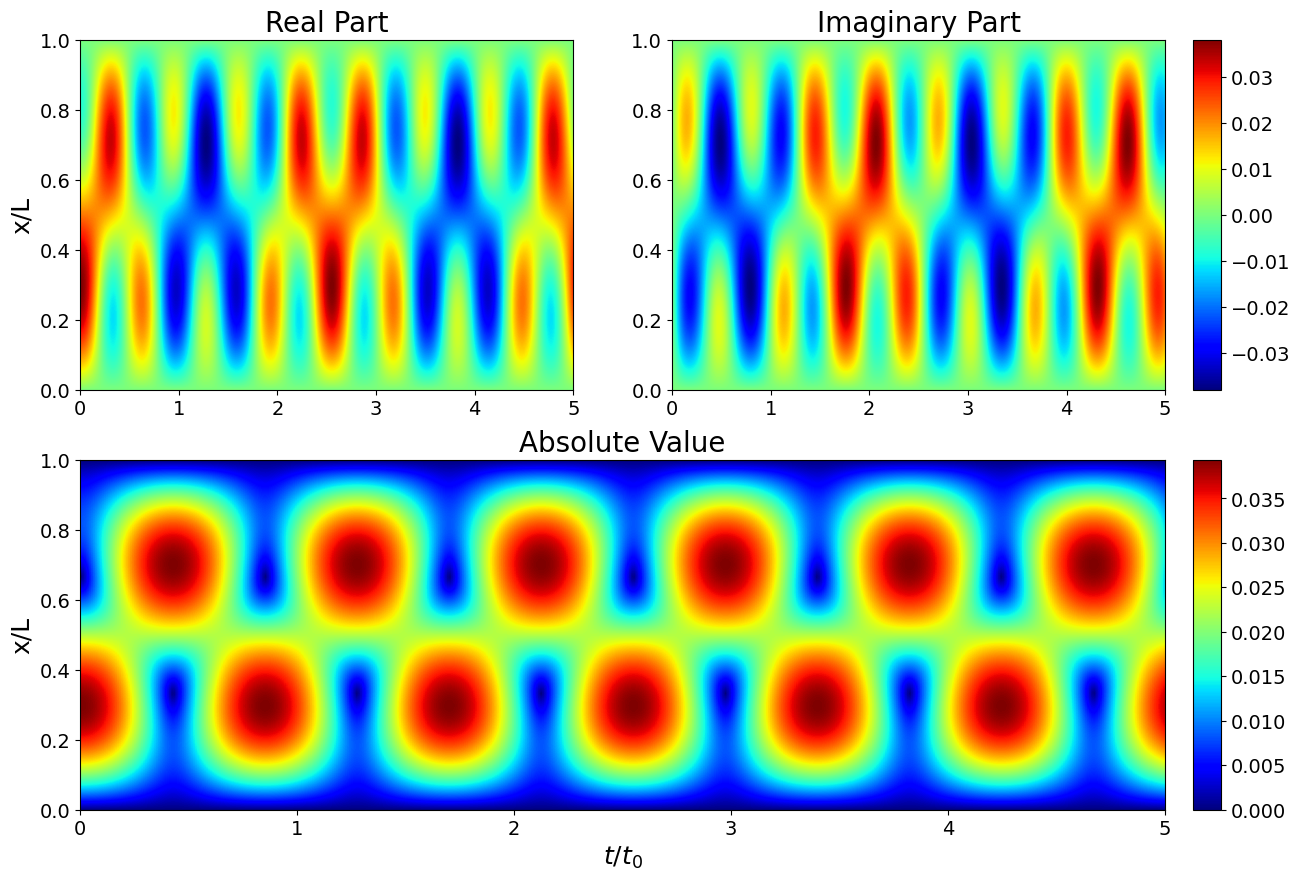

In [5]:
data = pd.read_csv('../data/raw/wavefunction_1.csv', header=None)

# Convert the DataFrame to a numpy array
data = data.values

data = string_to_complex_v(data)
real_parts = data[:,0:500].real
imag_parts = data[:,0:500].imag

N = real_parts.shape[0]
M = real_parts.shape[1]

x = np.linspace(0, 1, N+2)  # +2 to include the boundaries
dx = x[1]-x[0]

t = np.linspace(0, 1, M+2)  # +2 to include the boundaries
dt = t[1]-t[0]


absolute_values = np.sqrt(real_parts**2 + imag_parts**2)

plt.figure(figsize=(14, 10))

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1)
ax1.imshow(real_parts, cmap="jet", aspect='auto', extent=(0, 5, 0, 1))
ax1.set_title('Real Part', fontsize=20)
ax1.set_ylabel("x/L", fontsize=18)

ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1)
im2 = ax2.imshow(imag_parts, cmap="jet", aspect='auto', extent=(0, 5, 0, 1))
ax2.set_title('Imaginary Part', fontsize=20)

cbar_ax2 = plt.axes([0.92, 0.53, 0.02, 0.35])  # Adjust the position of the colorbar
plt.colorbar(im2, cax=cbar_ax2)


ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
im3 = ax3.imshow(absolute_values, cmap="jet", aspect='auto', extent=(0, 5, 0, 1))
ax3.set_title('Absolute Value', fontsize=20)
ax3.set_xlabel("$t/t_0$", fontsize=18)
ax3.set_ylabel("x/L", fontsize=18)

cbar_ax3 = plt.axes([0.92, 0.11, 0.02, 0.35])  # Adjust the position of the colorbar
plt.colorbar(im3, cax=cbar_ax3)
plt.savefig("../data/plots/particle_box.png")
plt.show()


0.9999999999999993


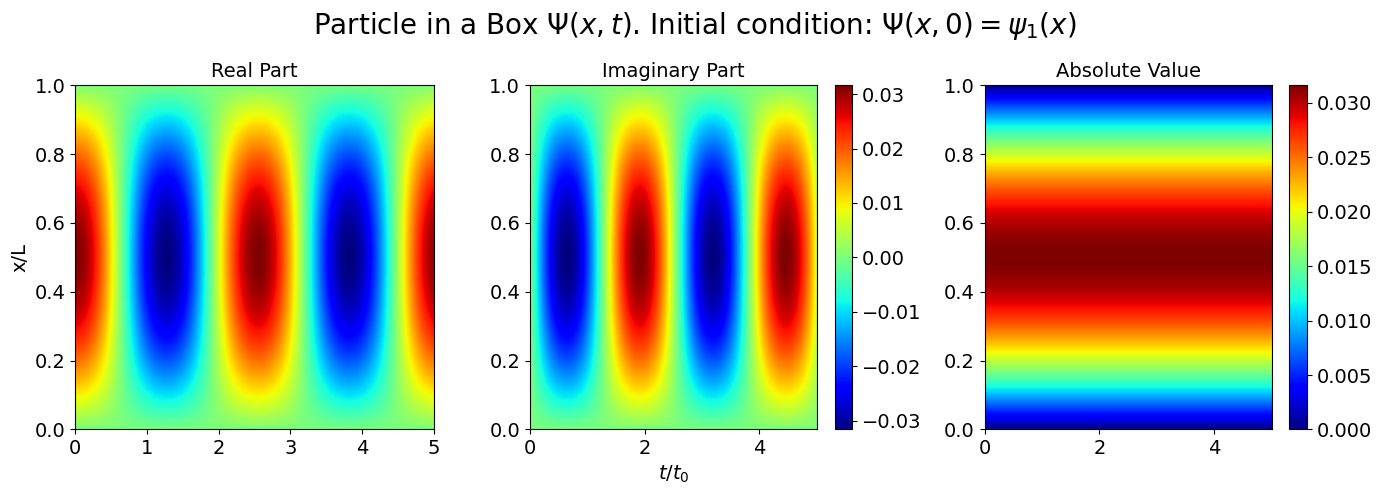

In [6]:
data = pd.read_csv('../data/raw/wavefunction_boring.csv', header=None)

# Convert the DataFrame to a numpy array
data = data.values

data = string_to_complex_v(data)
real_parts = data[:,0:500].real
imag_parts = data[:,0:500].imag

N = real_parts.shape[0]
M = real_parts.shape[1]

x = np.linspace(0, 1, N+2)  # +2 to include the boundaries
dx = x[1]-x[0]

t = np.linspace(0, 1, M+2)  # +2 to include the boundaries
dt = t[1]-t[0]


absolute_values = np.sqrt(real_parts**2 + imag_parts**2)
print(np.sum(absolute_values[:,0]**2))
plt.figure(figsize=(14, 5))
# Plot real part
plt.subplot(1, 3, 1)
plt.imshow(real_parts, cmap= "jet", aspect='auto', extent = (0,5,0,1))
plt.title('Real Part', fontsize = 14)
plt.ylabel("x/L", fontsize = 14)

# Plot imaginary part
plt.subplot(1, 3, 2)
plt.imshow(imag_parts, cmap= "jet", aspect='auto', extent = (0,5,0,1))
plt.colorbar()
plt.title('Imaginary Part', fontsize = 14)
plt.xlabel("$t/t_0$", fontsize = 14)


# Plot absolute value
plt.subplot(1, 3, 3)
plt.imshow(absolute_values, cmap= "jet", aspect='auto', extent = (0,5,0,1))
plt.colorbar()
plt.title('Absolute Value', fontsize = 14)



plt.suptitle("Particle in a Box $\Psi(x,t)$. Initial condition: $\Psi(x,0) = \psi_1(x) $", fontsize = 20)
plt.tight_layout()
plt.savefig("../data/plots/particle_box_boring.png")
plt.show()


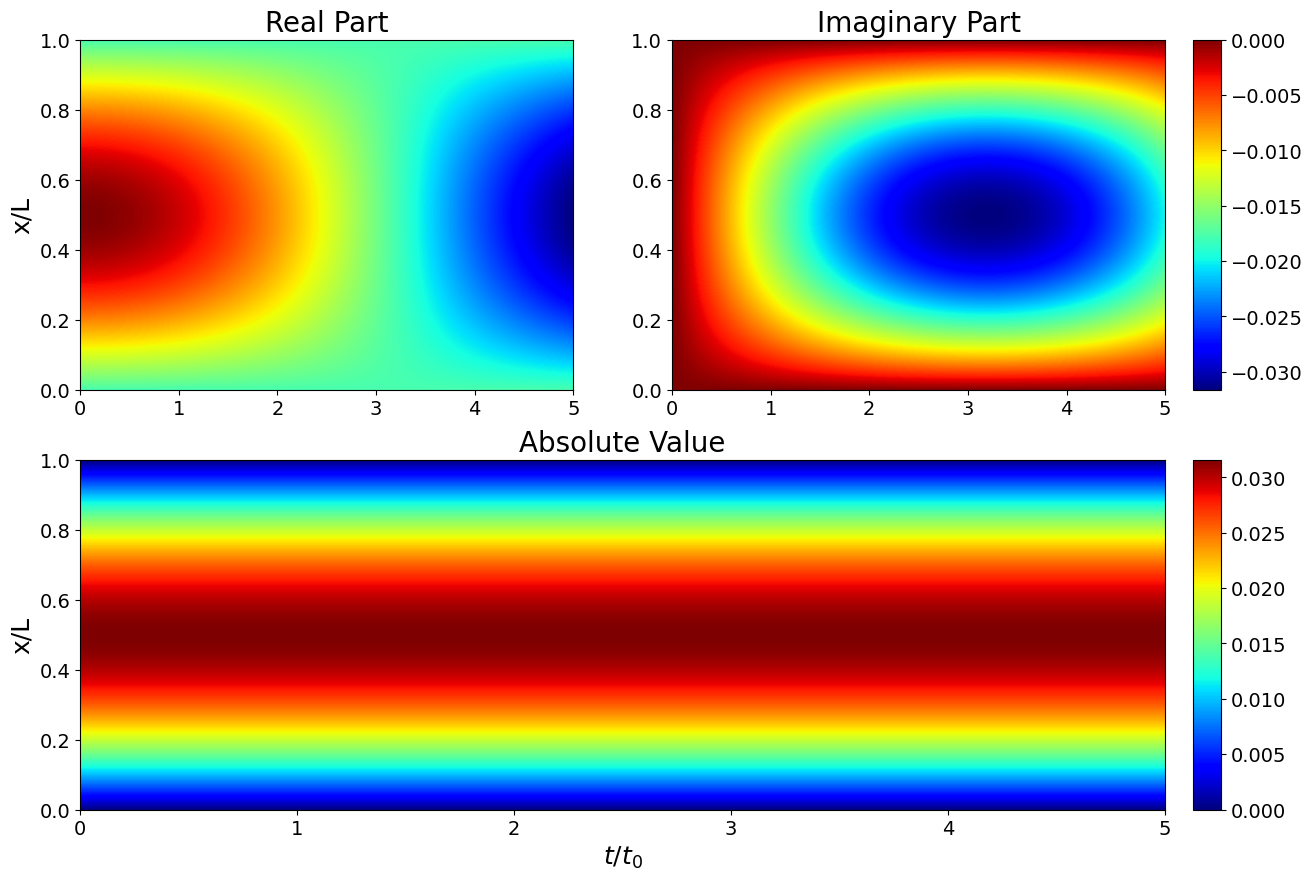

In [43]:
data = pd.read_csv('../data/raw/wavefunction_boring.csv', header=None)

# Convert the DataFrame to a numpy array
data = data.values

data = string_to_complex_v(data)
real_parts = data[:,0:500].real
imag_parts = data[:,0:500].imag

N = real_parts.shape[0]
M = real_parts.shape[1]

x = np.linspace(0, 1, N+2)  # +2 to include the boundaries
dx = x[1]-x[0]

t = np.linspace(0, 1, M+2)  # +2 to include the boundaries
dt = t[1]-t[0]


absolute_values = np.sqrt(real_parts**2 + imag_parts**2)

# Set the figure size
plt.figure(figsize=(14, 10))

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1)
ax1.imshow(real_parts, cmap="jet", aspect='auto', extent=(0, 5, 0, 1))
ax1.set_title('Real Part', fontsize=20)
ax1.set_ylabel("x/L", fontsize=18)

ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1)
im2 = ax2.imshow(imag_parts, cmap="jet", aspect='auto', extent=(0, 5, 0, 1))
ax2.set_title('Imaginary Part', fontsize=20)

cbar_ax2 = plt.axes([0.92, 0.53, 0.02, 0.35])  # Adjust the position of the colorbar
plt.colorbar(im2, cax=cbar_ax2)


ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
im3 = ax3.imshow(absolute_values, cmap="jet", aspect='auto', extent=(0, 5, 0, 1))
ax3.set_title('Absolute Value', fontsize=20)
ax3.set_xlabel("$t/t_0$", fontsize=18)
ax3.set_ylabel("x/L", fontsize=18)

cbar_ax3 = plt.axes([0.92, 0.11, 0.02, 0.35])  # Adjust the position of the colorbar
plt.colorbar(im3, cax=cbar_ax3)

plt.savefig("../data/plots/particle_box_boring.png")
plt.show()


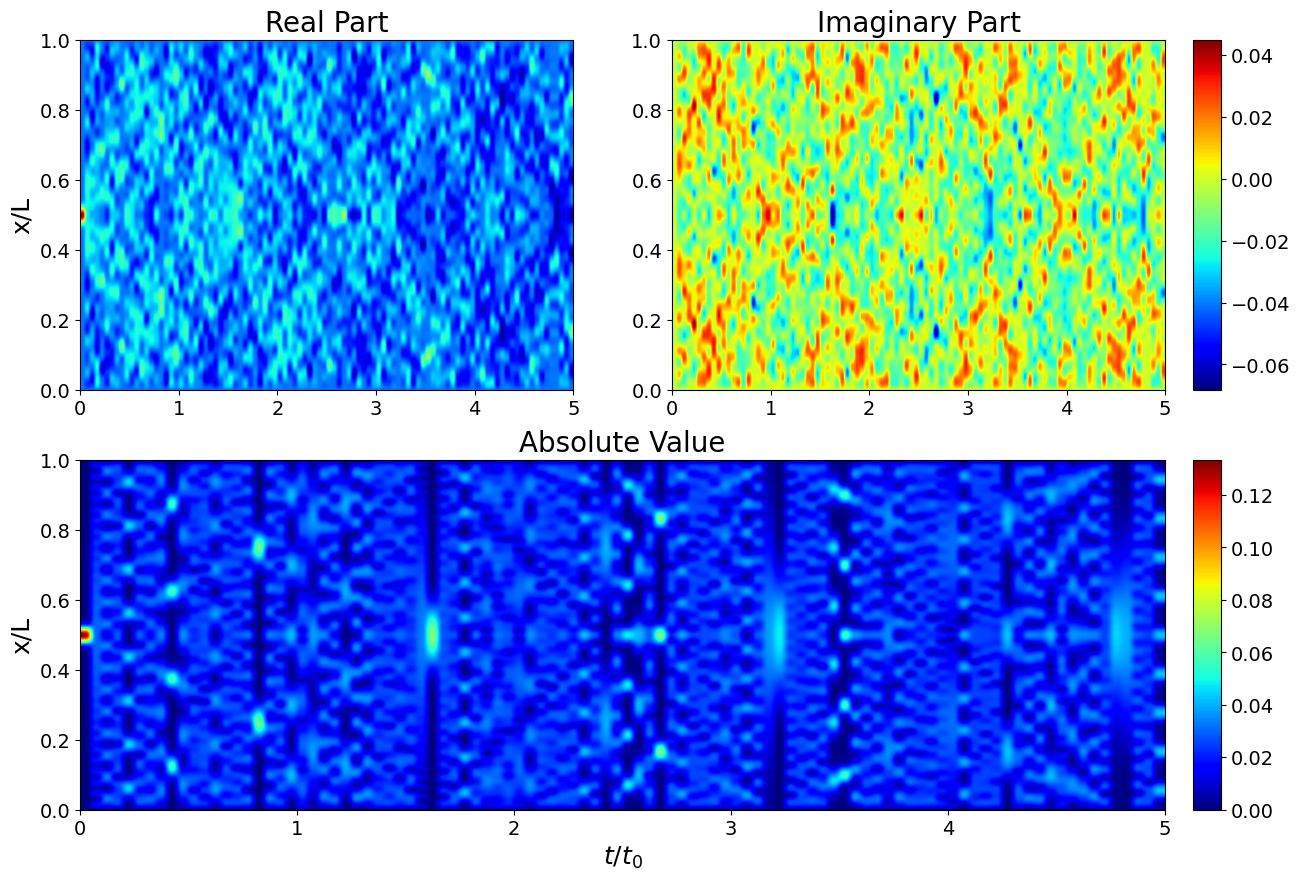

In [28]:
data = pd.read_csv('../data/raw/wavefunction_delta.csv', header=None)

# Convert the DataFrame to a numpy array
data = data.values

data = string_to_complex_v(data)
real_parts = data[:,0:100].real
imag_parts = data[:,0:100].imag

absolute_values = np.sqrt(real_parts**2 + imag_parts**2)

plt.figure(figsize=(14, 10))

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1)
ax1.imshow(real_parts, cmap="jet", aspect='auto', extent=(0, 5, 0, 1))
ax1.set_title('Real Part', fontsize=20)
ax1.set_ylabel("x/L", fontsize=18)

ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1)
im2 = ax2.imshow(imag_parts, cmap="jet", aspect='auto', extent=(0, 5, 0, 1))
ax2.set_title('Imaginary Part', fontsize=20)

cbar_ax2 = plt.axes([0.92, 0.53, 0.02, 0.35])  # Adjust the position of the colorbar
plt.colorbar(im2, cax=cbar_ax2)


ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
im3 = ax3.imshow(absolute_values, cmap="jet", aspect='auto', extent=(0, 5, 0, 1))
ax3.set_title('Absolute Value', fontsize=20)
ax3.set_xlabel("$t/t_0$", fontsize=18)
ax3.set_ylabel("x/L", fontsize=18)

cbar_ax3 = plt.axes([0.92, 0.11, 0.02, 0.35])  # Adjust the position of the colorbar
plt.colorbar(im3, cax=cbar_ax3)
plt.savefig("../data/plots/delta_in_box.png")
plt.show()

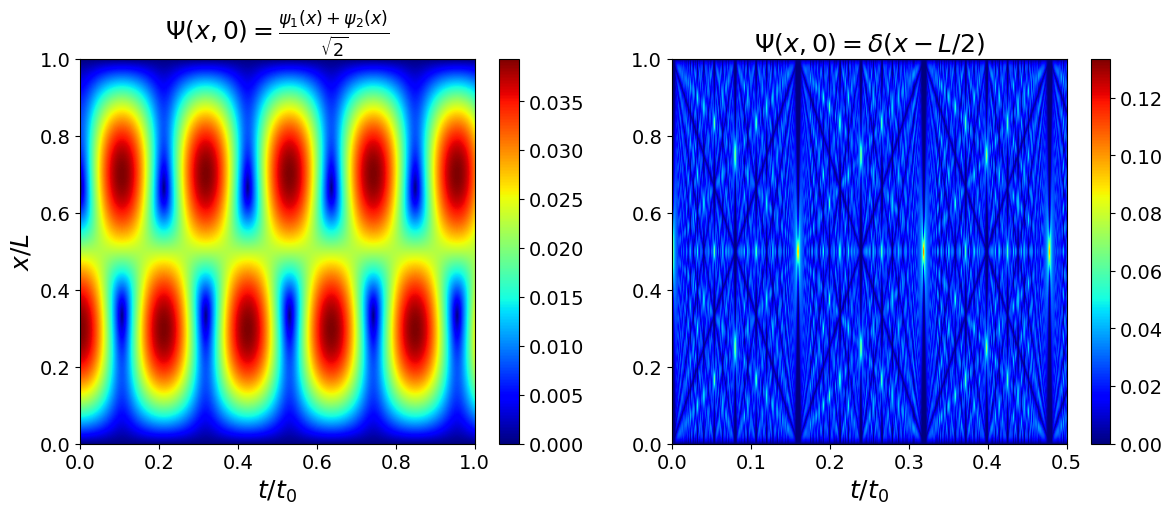

In [60]:
# Load and process the second dataset
data = pd.read_csv('../data/raw/wavefunction_1.csv', header=None)
data = data.values
data = string_to_complex_v(data)
real_parts = data[:, :].real
imag_parts = data[:, :].imag
absolute_values = np.sqrt(real_parts**2 + imag_parts**2)

plt.figure(figsize=(14, 5))
# Plot real part
plt.subplot(1, 2, 1)
plt.imshow(absolute_values, cmap= "jet", aspect='auto', extent = (0, 1 ,0,1))
plt.colorbar()
plt.title("$\Psi(x,0) = \\frac{\psi_1(x) + \psi_2(x)}{\sqrt{2}}$", fontsize = 18)
plt.ylabel("$x/L$", fontsize = 18)
plt.xlabel("$t/t_0$", fontsize = 18)


data = pd.read_csv('../data/raw/wavefunction_delta.csv', header=None)
data = data.values
data = string_to_complex_v(data)
real_parts = data[:, :500].real
imag_parts = data[:, :500].imag
absolute_values = np.sqrt(real_parts**2 + imag_parts**2)
# Plot imaginary part
plt.subplot(1, 2, 2)
plt.imshow(absolute_values, cmap= "jet", aspect='auto', extent = (0,0.5,0,1))
plt.colorbar()
plt.title('$\Psi(x,0) = \delta(x-L/2)$', fontsize = 18)
plt.xlabel("$t/t_0$", fontsize = 18)

plt.savefig("../data/plots/free_particle_IC.pdf")


[[ 68.53704292]
 [ 68.59641145]
 [267.54946021]
 [268.57849626]
 [523.70735993]
 [565.36277214]]


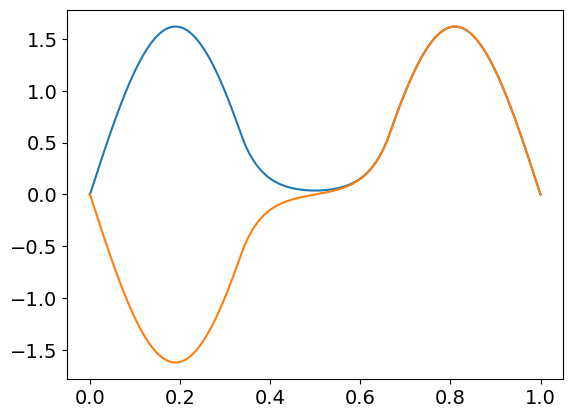

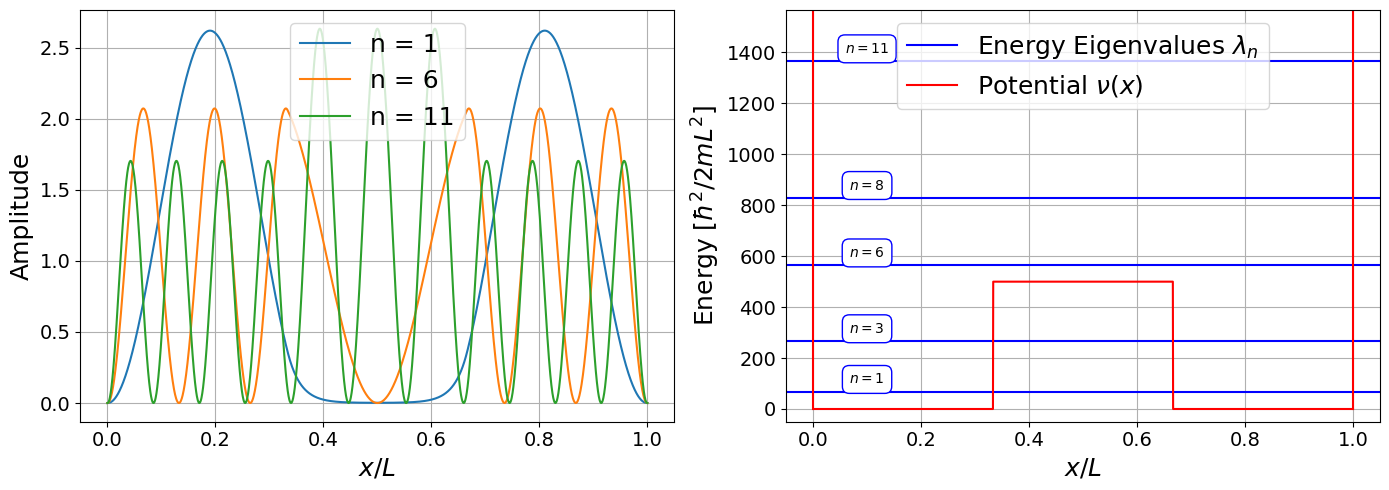

In [54]:
data = pd.read_csv('../data/raw/eigenvectors_barrier500.csv', header=None)
eigenvectors = data.to_numpy()

# Determine the number of points and create a position array
N = eigenvectors.shape[0]

x = np.linspace(0, 1, N+2)  # +2 to include the boundaries
dx = x[1]-x[0]
x_an = np.linspace(0, 1, 20)  # +2 to include the boundaries
plt.figure()
eigenvectors[:,0] = normalize(eigenvectors[:,0], dx)
plt.plot(x, np.insert(np.append(eigenvectors[:,0], 0), 0, 0), label=f'n = 1')
eigenvectors[:,1] = normalize(eigenvectors[:,1], dx)
plt.plot(x, np.insert(np.append(eigenvectors[:,1], 0), 0, 0), label=f'n = 1')

plt.figure(figsize=(14, 5))
plt.tight_layout()
plt.subplot(1, 2, 1)

eigenvectors[:,0] = normalize(eigenvectors[:,0], dx)
plt.plot(x, np.abs(np.insert(np.append(eigenvectors[:,0], 0), 0, 0))**2, label=f'n = 1')
eigenvectors[:,5] = normalize(eigenvectors[:,5], dx)
plt.plot(x, np.abs(np.insert(np.append(eigenvectors[:,5], 0), 0, 0))**2, label=f'n = 6')
eigenvectors[:,10] = normalize(eigenvectors[:,10], dx)
plt.plot(x, np.abs(np.insert(np.append(eigenvectors[:,10], 0), 0, 0))**2, label=f'n = 11')

# plt.title('Stationary states probability density $|\psi|^2$', fontsize = 20)
plt.xlabel('$x/L$', fontsize = 18)
plt.ylabel('Amplitude', fontsize = 18)
plt.legend(fontsize =18)
plt.grid(True)

data = pd.read_csv('../data/raw/eigenvalues_barrier500.csv', header=None)
eigenvalues = data.to_numpy()
print(eigenvalues[0:6])
data = pd.read_csv('../data/raw/potential_barrier500.csv', header=None)
V = data.to_numpy()
x = np.linspace(0,1,V.shape[0])

vertical_offset = 20

plt.subplot(1, 2, 2)
# plt.title("Energy eigenstates $\lambda_n$", fontsize = 18)

plt.axhline(eigenvalues[0], label = "Energy Eigenvalues $\lambda_n$", color = "blue")
plt.text(0.1, eigenvalues[0] + vertical_offset, f'$n = 1$', ha='center', va='bottom',
             bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))
plt.axhline(eigenvalues[2], color = "blue")
plt.text(0.1, eigenvalues[2] + vertical_offset, f'$n = 3$', ha='center', va='bottom',
             bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))
plt.axhline(eigenvalues[5], color = "blue")
plt.text(0.1, eigenvalues[5] + vertical_offset, f'$n = 6$', ha='center', va='bottom',
             bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))
plt.axhline(eigenvalues[7], color = "blue")
plt.text(0.1, eigenvalues[7] + vertical_offset, f'$n = 8$', ha='center', va='bottom',
             bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))
plt.axhline(eigenvalues[10], color = "blue")
plt.text(0.1, eigenvalues[10] + vertical_offset, f'$n = 11$', ha='center', va='bottom',
             bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))

plt.xlabel('$x/L$', fontsize = 18)
plt.ylabel("Energy [$\hbar^2/2mL^2}$]", fontsize =18)
plt.ylim(-50, eigenvalues[10]+200)
plt.plot(x, V, color = "red", label = "Potential $\\nu(x)$" )
plt.plot([0,0],[0,10000], color = "red")
plt.plot([1,1],[0,10000], color = "red")

plt.legend(fontsize = 18)
plt.grid(True)
plt.tight_layout()
plt.savefig("../data/plots/stationary_box_barrier500.png")


In [15]:

def f(x, v0):
    kappa = np.sqrt(v0-x) 
    k = np.sqrt(x) 
    fac1 = np.exp(kappa/3)*(kappa*np.sin(k/3)+k*np.cos(k/3))**2
    fac2 = np.exp(-kappa/3)*(kappa*np.sin(k/3)-k*np.cos(k/3))**2
    return fac1 - fac2

[ 68.61372274  68.71374275 267.85357071 267.95359072 268.85377075
 268.95379076]


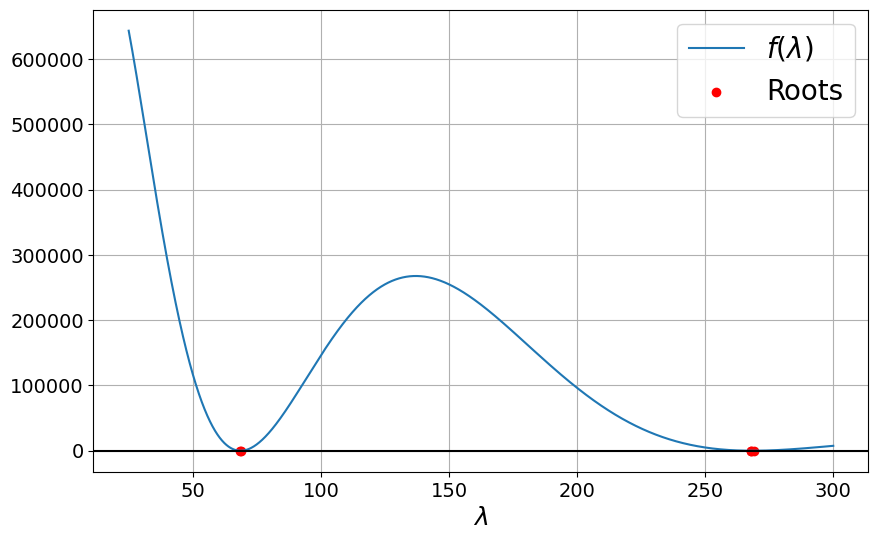

In [53]:

# Parameters
v0 = 500  # given potential
lambda_range = np.linspace(0, v0, 5000)  # range of lambda values

# Calculate the function values
f_values = f(lambda_range, v0)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(lambda_range[250:3000], f_values[250:3000], label=r'$f(\lambda)$')
plt.xlabel(r'$\lambda$', fontsize = 18)
plt.axhline(0, color = 'black')
plt.scatter(lambda_range[np.isclose(f_values, 0, atol = 1)][1:-2], f_values[np.isclose(f_values, 0, atol = 1)][1:-2], color = 'red', label = "Roots", marker='o',alpha =1)
plt.legend(fontsize = 20)

plt.grid(True)
plt.savefig("../data/plots/roots.png")

print(lambda_range[np.isclose(f_values, 0, atol = 1)][1:-1])

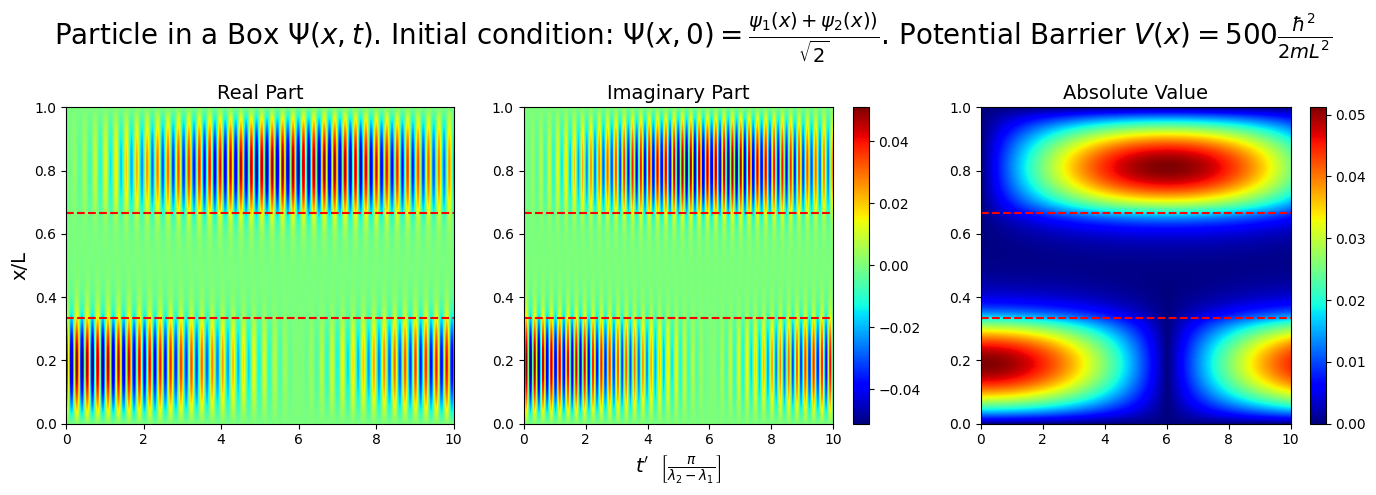

In [17]:
data = pd.read_csv('../data/raw/wavefunction_barrier500_10T.csv', header=None)

# Convert the DataFrame to a numpy array
data = data.values

data = string_to_complex_v(data)
real_parts = data[:,0:500].real
imag_parts = data[:,0:500].imag

N = real_parts.shape[0]
M = real_parts.shape[1]

x = np.linspace(0, 1, N+2)  # +2 to include the boundaries
dx = x[1]-x[0]

t = np.linspace(0, 1, M+2)  # +2 to include the boundaries
dt = t[1]-t[0]


absolute_values = np.sqrt(real_parts**2 + imag_parts**2)

plt.figure(figsize=(14, 5))
# Plot real part
plt.subplot(1, 3, 1)
plt.imshow(real_parts, cmap= "jet", aspect='auto', extent = (0,10,0,1))
plt.hlines(y=(1/3, 2/3), xmin=0, xmax=10, color='red', linestyles='--')
plt.title('Real Part', fontsize = 14)
plt.ylabel("x/L", fontsize = 14)

# Plot imaginary part
plt.subplot(1, 3, 2)
plt.imshow(imag_parts, cmap= "jet", aspect='auto', extent = (0,10,0,1))
plt.hlines(y=(1/3, 2/3), xmin=0, xmax=10, color='red', linestyles='--')

plt.colorbar()
plt.title('Imaginary Part', fontsize = 14)
plt.xlabel("$t'$  $\left[\\frac{\pi}{\lambda_2-\lambda_1}\\right]$", fontsize = 14)


# Plot absolute value
plt.subplot(1, 3, 3)
plt.imshow(absolute_values, cmap= "jet", aspect='auto', extent = (0,10,0,1))
plt.hlines(y=(1/3, 2/3), xmin=0, xmax=10, color='red', linestyles='--')
plt.colorbar()
plt.title('Absolute Value', fontsize = 14)



plt.suptitle("Particle in a Box $\Psi(x,t)$. Initial condition: $\Psi(x,0) = \\frac{\psi_1(x) + \psi_2(x))}{\sqrt{2}} $. Potential Barrier $V(x) = 500 \\frac{\hbar^2}{2mL^2}$ ", fontsize = 20)
plt.tight_layout()
plt.savefig("../data/plots/wavefunction_barrier500_T.png")
plt.show()


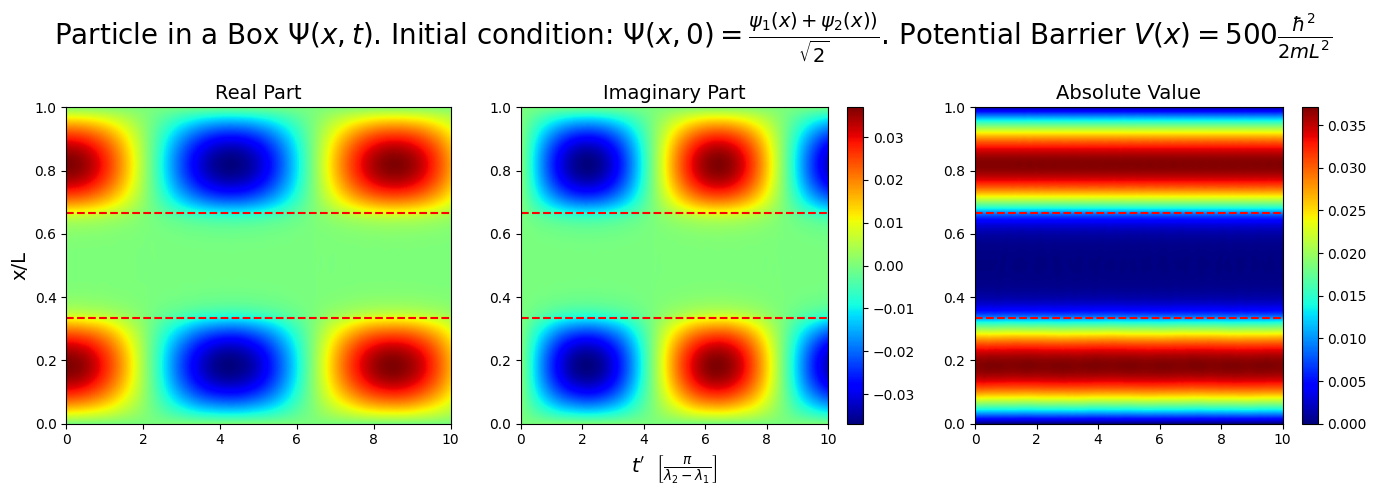

In [18]:
data = pd.read_csv('../data/raw/it_schemes/test2.csv', header=None)

# Convert the DataFrame to a numpy array
data = data.values
t = data[0,:].astype(np.float64)  
dt = t[1]-t[0]
data = string_to_complex_v(data[2:,0:200])
real_parts = data[3:,0:200].real
imag_parts = data[3:,0:200].imag

N = real_parts.shape[0]
M = real_parts.shape[1]

x = np.linspace(0, 1, N+2) 
dx = x[1]-x[0]




absolute_values = np.sqrt(real_parts**2 + imag_parts**2)

plt.figure(figsize=(14, 5))
# Plot real part
plt.subplot(1, 3, 1)
plt.imshow(real_parts, cmap= "jet", aspect='auto', extent = (0,10,0,1))
plt.hlines(y=(1/3, 2/3), xmin=0, xmax=10, color='red', linestyles='--')
plt.title('Real Part', fontsize = 14)
plt.ylabel("x/L", fontsize = 14)

# Plot imaginary part
plt.subplot(1, 3, 2)
plt.imshow(imag_parts, cmap= "jet", aspect='auto', extent = (0,10,0,1))
plt.hlines(y=(1/3, 2/3), xmin=0, xmax=10, color='red', linestyles='--')

plt.colorbar()
plt.title('Imaginary Part', fontsize = 14)
plt.xlabel("$t'$  $\left[\\frac{\pi}{\lambda_2-\lambda_1}\\right]$", fontsize = 14)


# Plot absolute value
plt.subplot(1, 3, 3)
plt.imshow(absolute_values, cmap= "jet", aspect='auto', extent = (0,10,0,1))
plt.hlines(y=(1/3, 2/3), xmin=0, xmax=10, color='red', linestyles='--')
plt.colorbar()
plt.title('Absolute Value', fontsize = 14)



plt.suptitle("Particle in a Box $\Psi(x,t)$. Initial condition: $\Psi(x,0) = \\frac{\psi_1(x) + \psi_2(x))}{\sqrt{2}} $. Potential Barrier $V(x) = 500 \\frac{\hbar^2}{2mL^2}$ ", fontsize = 20)
plt.tight_layout()
plt.savefig("../data/plots/wavefunction_barrier500_T.png")
plt.show()

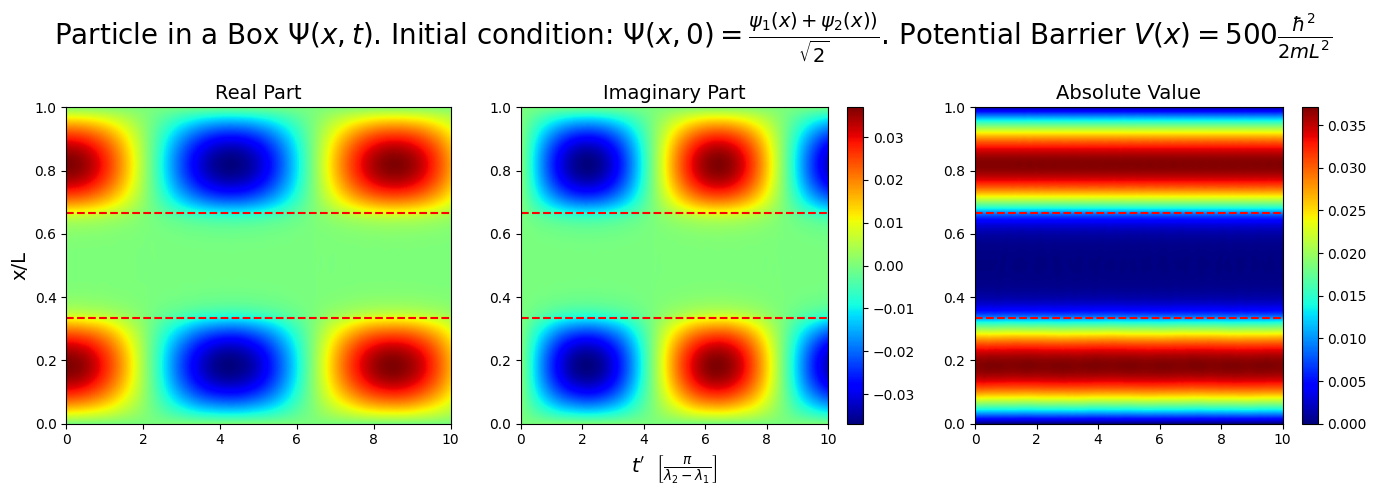

In [25]:
data = pd.read_csv('../data/raw/it_schemes/test2.csv', header=None)

# Convert the DataFrame to a numpy array
data = data.values
t = data[0,:].astype(np.float64)  
dt = t[1]-t[0]
data = string_to_complex_v(data[2:,0:200])
real_parts = data[3:,0:200].real
imag_parts = data[3:,0:200].imag

N = real_parts.shape[0]
M = real_parts.shape[1]

x = np.linspace(0, 1, N+2) 
dx = x[1]-x[0]




absolute_values = np.sqrt(real_parts**2 + imag_parts**2)

plt.figure(figsize=(14, 5))
# Plot real part
plt.subplot(1, 3, 1)
plt.imshow(real_parts, cmap= "jet", aspect='auto', extent = (0,10,0,1))
plt.hlines(y=(1/3, 2/3), xmin=0, xmax=10, color='red', linestyles='--')
plt.title('Real Part', fontsize = 14)
plt.ylabel("x/L", fontsize = 14)

# Plot imaginary part
plt.subplot(1, 3, 2)
plt.imshow(imag_parts, cmap= "jet", aspect='auto', extent = (0,10,0,1))
plt.hlines(y=(1/3, 2/3), xmin=0, xmax=10, color='red', linestyles='--')

plt.colorbar()
plt.title('Imaginary Part', fontsize = 14)
plt.xlabel("$t'$  $\left[\\frac{\pi}{\lambda_2-\lambda_1}\\right]$", fontsize = 14)


# Plot absolute value
plt.subplot(1, 3, 3)
plt.imshow(absolute_values, cmap= "jet", aspect='auto', extent = (0,10,0,1))
plt.hlines(y=(1/3, 2/3), xmin=0, xmax=10, color='red', linestyles='--')
plt.colorbar()
plt.title('Absolute Value', fontsize = 14)



plt.suptitle("Particle in a Box $\Psi(x,t)$. Initial condition: $\Psi(x,0) = \\frac{\psi_1(x) + \psi_2(x))}{\sqrt{2}} $. Potential Barrier $V(x) = 500 \\frac{\hbar^2}{2mL^2}$ ", fontsize = 20)
plt.tight_layout()
plt.savefig("../data/plots/wavefunction_barrier500_T.png")
plt.show()

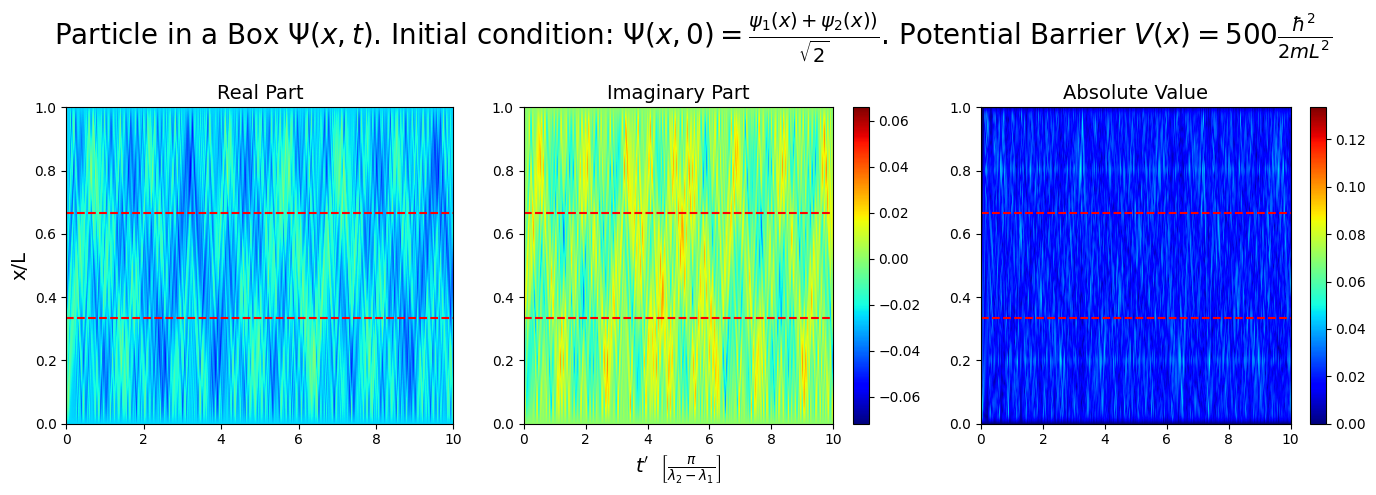

In [29]:
data = pd.read_csv('../data/raw/it_schemes/psi_delta.csv', header=None)

# Convert the DataFrame to a numpy array
data = data.values
t = data[0,:].astype(np.float64)  
dt = t[1]-t[0]
data = string_to_complex_v(data[2:,:])
real_parts = data[3:,:].real
imag_parts = data[3:,:].imag
N = real_parts.shape[0]
M = real_parts.shape[1]

x = np.linspace(0, 1, N+2) 
dx = x[1]-x[0]




absolute_values = np.sqrt(real_parts**2 + imag_parts**2)

plt.figure(figsize=(14, 5))
# Plot real part
plt.subplot(1, 3, 1)
plt.imshow(real_parts, cmap= "jet", aspect='auto', extent = (0,10,0,1))
plt.hlines(y=(1/3, 2/3), xmin=0, xmax=10, color='red', linestyles='--')
plt.title('Real Part', fontsize = 14)
plt.ylabel("x/L", fontsize = 14)

# Plot imaginary part
plt.subplot(1, 3, 2)
plt.imshow(imag_parts, cmap= "jet", aspect='auto', extent = (0,10,0,1))
plt.hlines(y=(1/3, 2/3), xmin=0, xmax=10, color='red', linestyles='--')

plt.colorbar()
plt.title('Imaginary Part', fontsize = 14)
plt.xlabel("$t'$  $\left[\\frac{\pi}{\lambda_2-\lambda_1}\\right]$", fontsize = 14)


# Plot absolute value
plt.subplot(1, 3, 3)
plt.imshow(absolute_values, cmap= "jet", aspect='auto', extent = (0,10,0,1))
plt.hlines(y=(1/3, 2/3), xmin=0, xmax=10, color='red', linestyles='--')
plt.colorbar()
plt.title('Absolute Value', fontsize = 14)



plt.suptitle("Particle in a Box $\Psi(x,t)$. Initial condition: $\Psi(x,0) = \\frac{\psi_1(x) + \psi_2(x))}{\sqrt{2}} $. Potential Barrier $V(x) = 500 \\frac{\hbar^2}{2mL^2}$ ", fontsize = 20)
plt.tight_layout()
plt.savefig("../data/plots/wavefunction_barrier500_T.png")
plt.show()

1001000.0


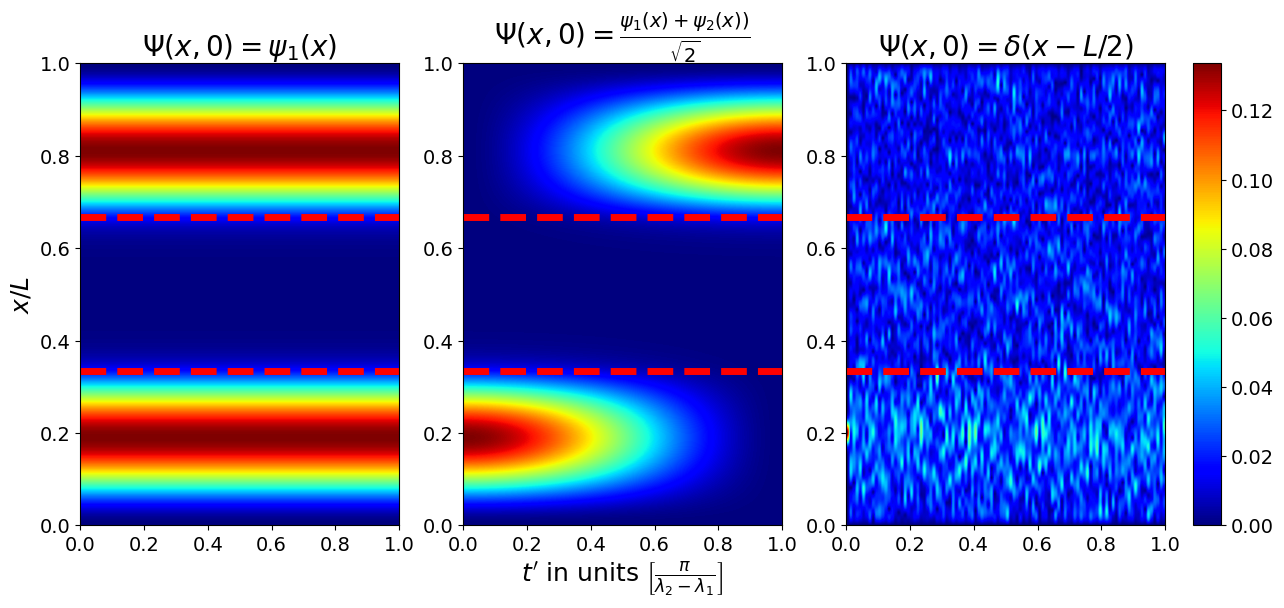

In [52]:
data = pd.read_csv('../data/raw/wavefunction_boring_10T.csv', header=None)

# Convert the DataFrame to a numpy array
data = data.values
dt = t[1]-t[0]
data = string_to_complex_v(data[:,:])
real_parts = data[:,:].real
imag_parts = data[:,:].imag

N = real_parts.shape[0]
M = real_parts.shape[1]

x = np.linspace(0, 1, N+2) 
dx = x[1]-x[0]

absolute_values = (real_parts**2 + imag_parts**2)

plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=1)
im1 = ax1.imshow(absolute_values, cmap="jet", aspect='auto', extent=(0, 1, 0, 1))
ax1.set_title("$\Psi(x,0) = \psi_1(x)$", fontsize=20)
ax1.set_ylabel("$x/L$", fontsize=18)
ax1.hlines(y=(1/3, 2/3), xmin=0, xmax=1, color='red', linestyles='--', linewidth = 5)

data = pd.read_csv('../data/raw/wavefunction_12_10T.csv', header=None)

# Convert the DataFrame to a numpy array
data = data.values

data = string_to_complex_v(data)
real_parts = data[:,:].real
imag_parts = data[:,:].imag

N = real_parts.shape[0]
M = real_parts.shape[1]

x = np.linspace(0, 1, N+2)  # +2 to include the boundaries
dx = x[1]-x[0]

t = np.linspace(0, 1, M+2)  # +2 to include the boundaries
dt = t[1]-t[0]


absolute_values = (real_parts**2 + imag_parts**2)

ax2 = plt.subplot2grid((1, 3), (0, 1), colspan=1)
im2 = ax2.imshow(absolute_values, cmap="jet", aspect='auto', extent=(0, 1, 0, 1))
ax2.set_title("$\Psi(x,0) = \\frac{\psi_1(x) + \psi_2(x))}{\sqrt{2}}$", fontsize=20)
ax2.set_xlabel("$t'$ in units $\left[\\frac{\pi}{\lambda_2-\lambda_1}\\right]$", fontsize=18)
ax2.hlines(y=(1/3, 2/3), xmin=0, xmax=1, color='red', linestyles='--', linewidth = 5)

plt.colorbar(im2, cax=cbar_ax2)

absolute_values = (real_parts**2 + imag_parts**2)


data = pd.read_csv('../data/raw/wavefunction_delta_10T.csv', header=None)
# Convert the DataFrame to a numpy array
data = data.values
print(data.size/4)
data = string_to_complex_v(data[:,:])
real_parts = data[:,:].real
imag_parts = data[:,:].imag

dt = t[1]-t[0]


N = real_parts.shape[0]
M = real_parts.shape[1]

x = np.linspace(0, 1, N+2) 
dx = x[1]-x[0]
absolute_values = np.sqrt(real_parts**2 + imag_parts**2)

ax3 = plt.subplot2grid((1, 3), (0, 2), colspan=1)
im3 = ax3.imshow(absolute_values[:,0:100], cmap="jet", aspect='auto', extent=(0, 1, 0, 1))
ax3.set_title("$\Psi(x,0) = \delta(x-L/2)$", fontsize=20)
ax3.hlines(y=(1/3, 2/3), xmin=0, xmax=1, color='red', linestyles='--', linewidth = 5)

cbar_ax3 = plt.axes([0.92, 0.11, 0.02, 0.77])  # Adjust the position of the colorbar
plt.colorbar(im3, cax=cbar_ax3)
plt.savefig("../data/plots/barrier_IC.png")
plt.show()


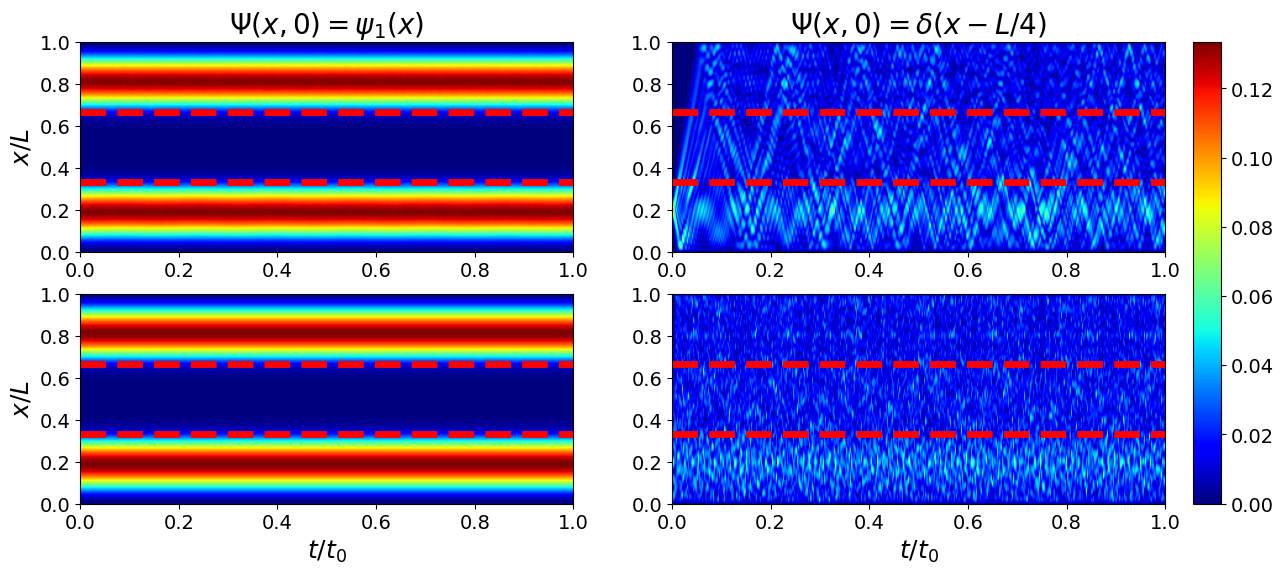

In [51]:
data = pd.read_csv('../data/raw/it_schemes/psi_1.csv', header=None)

# Convert the DataFrame to a numpy array
data = data.values
t = data[0,:].astype(np.float64)  
dt = t[1]-t[0]
data = string_to_complex_v(data[2:,0:400])
real_parts = data[2:,0:400].real
imag_parts = data[2:,0:400].imag
absolute_values = (real_parts**2 + imag_parts**2)

plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1)
im1 = ax1.imshow(absolute_values, cmap="jet", aspect='auto', extent=(0, 1, 0, 1))
ax1.set_title("$\Psi(x,0) = \psi_1(x)$", fontsize=20)
ax1.set_ylabel("$x/L$", fontsize=18)
ax1.hlines(y=(1/3, 2/3), xmin=0, xmax=1, color='red', linestyles='--', linewidth = 5)

data = pd.read_csv('../data/raw/wavefunction_1_compare.csv', header=None)

# Convert the DataFrame to a numpy array
data = data.values

data = string_to_complex_v(data[:,0:400])
real_parts = data[:,0:400].real
imag_parts = data[:,0:400].imag

absolute_values = (real_parts**2 + imag_parts**2)

ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
im2 = ax2.imshow(absolute_values, cmap="jet", aspect='auto', extent=(0, 1, 0, 1))
ax2.set_xlabel("$t/t_0$", fontsize=18)
ax2.hlines(y=(1/3, 2/3), xmin=0, xmax=1, color='red', linestyles='--', linewidth = 5)
ax2.set_ylabel("$x/L$", fontsize=18)

plt.colorbar(im2, cax=cbar_ax2)

absolute_values = (real_parts**2 + imag_parts**2)


data = pd.read_csv('../data/raw/it_schemes/psi_delta.csv', header=None)
# Convert the DataFrame to a numpy array
data = data.values
t = data[0,:].astype(np.float64)  
dt = t[1]-t[0]
data = string_to_complex_v(data[2:,0:400])
real_parts = data[2:,0:400].real
imag_parts = data[2:,0:400].imag

absolute_values = np.sqrt(real_parts**2 + imag_parts**2)

ax3 = plt.subplot2grid((2, 2), (0, 1), colspan=1)
im3 = ax3.imshow(absolute_values, cmap="jet", aspect='auto', extent=(0, t[400], 0, 1))
ax3.hlines(y=(1/3, 2/3), xmin=0, xmax=t[400], color='red', linestyles='--', linewidth = 5)
ax3.set_title("$\Psi(x,0) = \delta(x-L/4)$", fontsize=20)

cbar_ax3 = plt.axes([0.92, 0.11, 0.02, 0.77])  # Adjust the position of the colorbar

data = pd.read_csv('../data/raw/wavefunction_delta_compare.csv', header=None)
# Convert the DataFrame to a numpy array
data = data.values
data = string_to_complex_v(data[:,0:400])
real_parts = data[:,0:400].real
imag_parts = data[:,0:400].imag

absolute_values = np.sqrt(real_parts**2 + imag_parts**2)

ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1)
im4 = ax4.imshow(absolute_values, cmap="jet", aspect='auto', extent=(0, t[400], 0, 1))
ax4.hlines(y=(1/3, 2/3), xmin=0, xmax=t[400], color='red', linestyles='--', linewidth = 5)
ax4.set_xlabel("$t/t_0$", fontsize=18)


plt.colorbar(im3, cax=cbar_ax3)
plt.savefig("../data/plots/barrier_IC00.png")
plt.show()

1.9801980198019802


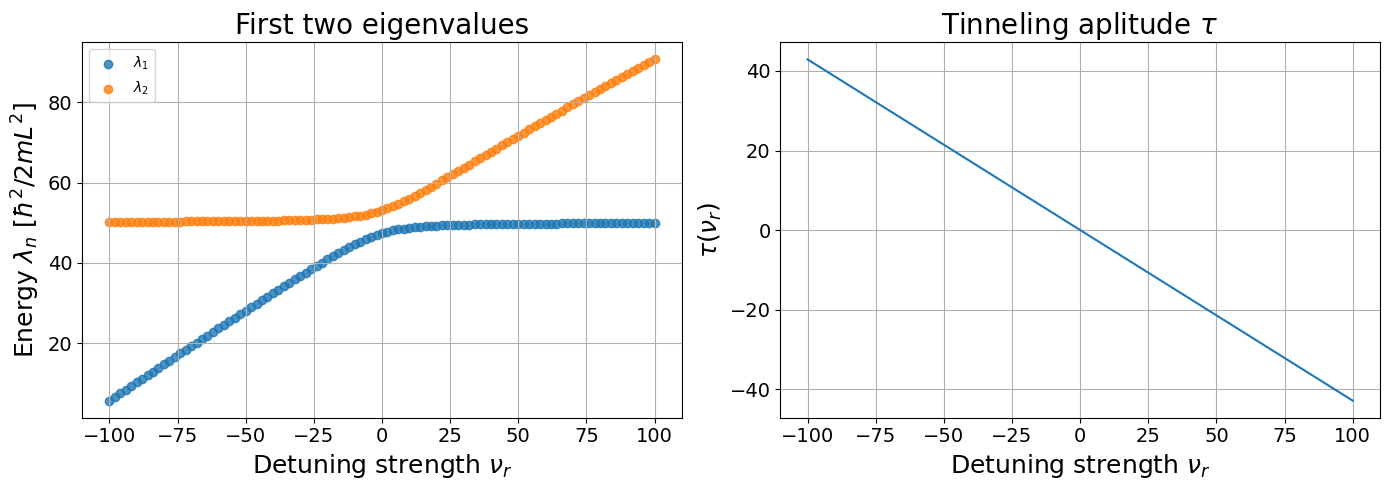

In [213]:
data = pd.read_csv('../data/raw/eigenvalues_different_Vr.csv', header=None)
eigs = data.to_numpy()
print(200/101)
V = np.linspace(-100,100,101)

plt.figure(figsize=(14, 5))
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1)

ax1.scatter(V,eigs[0,:],label = "$\lambda_1$", alpha = 0.8)
ax1.scatter(V,eigs[1,:],label = "$\lambda_2$", alpha = 0.8)
ax1.set_xlabel("Detuning strength $\\nu_r$")
ax1.set_ylabel("Energy $\lambda_n$ [$\hbar^2/2mL^2}$]")
ax1.set_title("First two eigenvalues")
ax1.grid(True)

ax1.legend()

data = pd.read_csv('../data/raw/tau3.csv', header=None)
tau = data.to_numpy()
V = np.linspace(-100,100,tau.size-1)

ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1)

ax2.plot(V,tau[:-1])
ax2.set_title("Tinneling aplitude $\\tau$")
ax2.set_xlabel("Detuning strength $\\nu_r$")
ax2.set_ylabel("$\\tau(\\nu_r)$")
ax2.grid(True)
plt.tight_layout()
plt.savefig("../data/plots/tamp.pdf")


# data = pd.read_csv('../data/raw/tau3.csv', header=None)
# tau = data.to_numpy()
# V = np.linspace(-100,100,tau.size-1)
# plt.plot(V,tau[:-1])
# plt.grid
# plt.savefig("../data/plots/detuning.pdf")


# data = pd.read_csv('../data/raw/potential_mat.csv', header=None)
# V_mat = data.values
# plt.figure()
# plt.imshow(V_mat, cmap= "jet", aspect='auto', extent = (0,21,0,1))
# plt.hlines(y=(1/3, 2/3), xmin=0, xmax=21, color='black', linestyles='--')
# plt.xlabel("$\\nu_r$")
# plt.ylabel("$x/L$")
# plt.colorbar()

# plt.figure()
# plt.plot(eigs[1,:] - eigs[0,:])

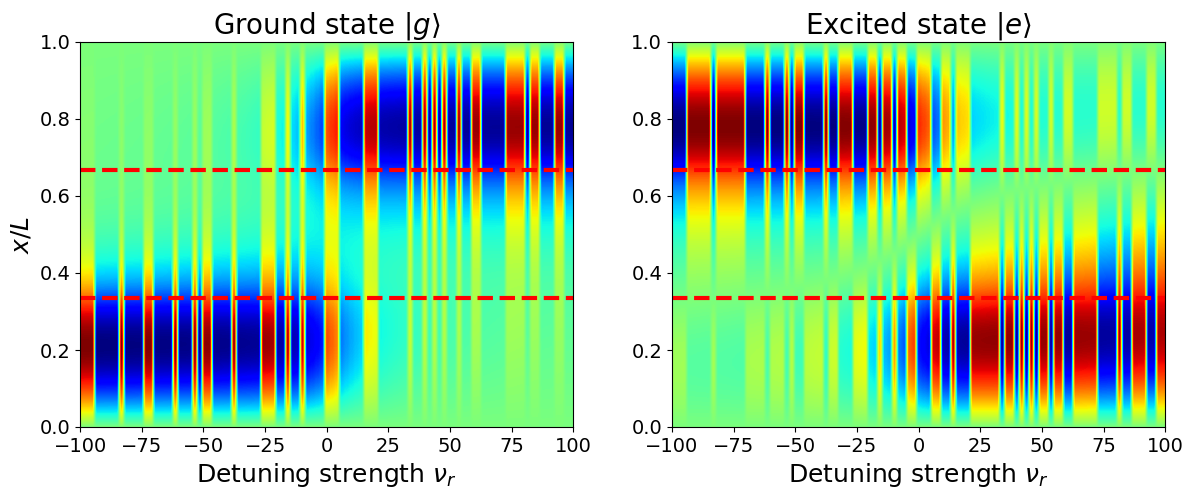

In [101]:
data1 = pd.read_csv('../data/raw/vec1_Vr.csv', header=None)
data1 = data1.values
data2 = pd.read_csv('../data/raw/vec2_Vr.csv', header=None)
data2 = data2.values

plt.figure(figsize=(14, 5))

ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax1.hlines(y=(1/3, 2/3), xmin=-100, xmax=100, color='red', linestyles='--', linewidth = 3)

im1 = ax1.imshow(data1, cmap= "jet", aspect='auto', extent = (-100,100,0,1))
ax1.set_xlabel("Detuning strength $\\nu_r$")
ax1.set_ylabel("$x/L$")
ax1.set_title("Ground state $|g\\rangle$")

ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1)
ax2.hlines(y=(1/3, 2/3), xmin=-100, xmax=100, color='red', linestyles='--', linewidth = 3)

im2 = ax2.imshow(data2, cmap= "jet", aspect='auto', extent = (-100,100,0,1))
ax2.set_xlabel("Detuning strength $\\nu_r$")
ax2.set_title("Excited state $|e\\rangle$")
plt.savefig("../data/plots/twostatesystem.pdf")


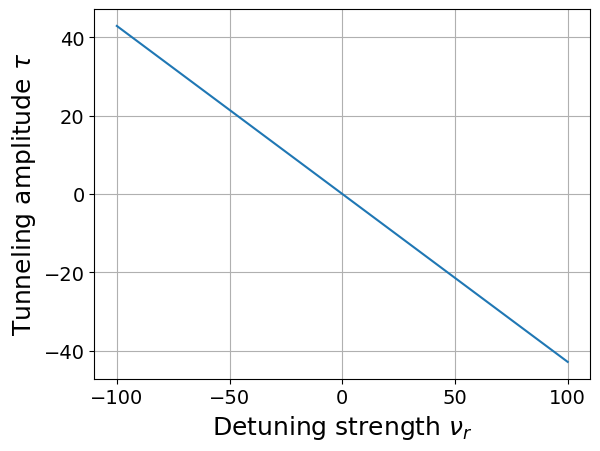

In [105]:
data = pd.read_csv('../data/raw/tau3.csv', header=None)
tau = data.to_numpy()
V = np.linspace(-100,100,tau.size-1)
plt.plot(V,tau[:-1])
plt.grid
plt.xlabel("Detuning strength $\\nu_r$")
plt.ylabel("Tunneling amplitude $\\tau$")
plt.grid(True)
plt.savefig("../data/plots/tamp.pdf")



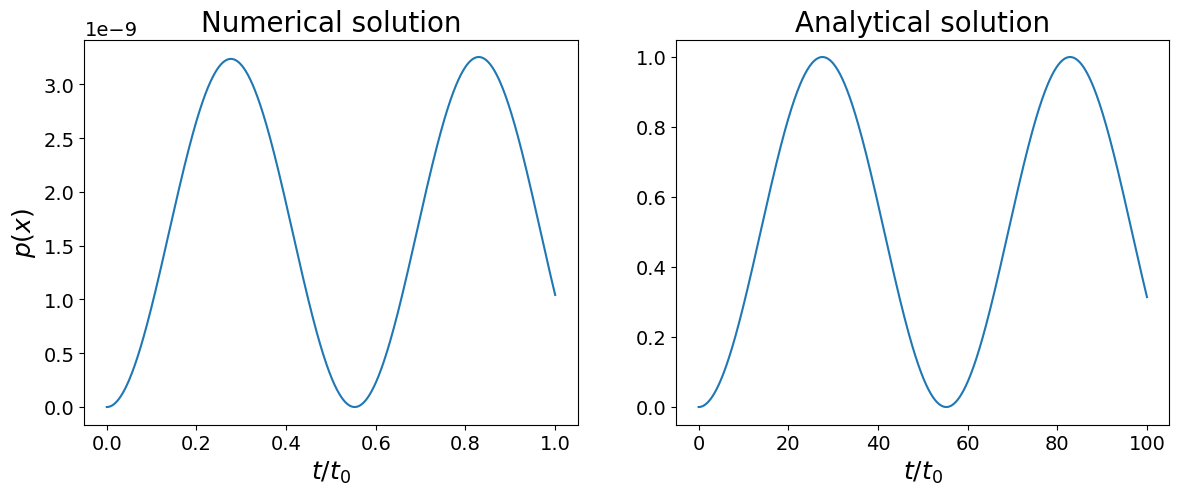

In [203]:
t1 = np.linspace(0,1,1001)
data1 = pd.read_csv('../data/raw/pt.csv', header=None)
data1 = data1.values
data2 = pd.read_csv('../data/raw/pt_an.csv', header=None)
t2 = np.linspace(0,100,1001)
data2 = data2.values**2

plt.figure(figsize=(14, 5))

ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax1.set_xlabel("$t/t_0$")
ax1.set_ylabel("$p(x)$")
ax1.set_title("Numerical solution")
ax1.plot(t1,data1)

ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1)
ax2.set_xlabel("$t/t_0$")
ax2.set_title("Analytical solution")
ax2.plot(t2,data2)

plt.savefig("../data/plots/rabi.pdf")